In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

- Read data from `precessed_data.csv`

In [2]:
courses_df = pd.read_csv('../Data/processed_data.csv', sep=',',engine='python', encoding='utf-8')
courses_df

,name,enrollment,language,rating,level,duration,instructor,offered by,instructor_rate
0,The Science of Success: What Researchers Know ...,173770,English,4.8,Beginner,11,Paula Caproni,University of Michigan,4.8
1,Microsoft Azure Databricks for Data Engineering,12942,English,4.4,Intermediate,21,Microsoft,Microsoft,4.2
2,Finance for Everyone: Debt,15586,English,4.8,Other,11,Arshad Ahmad,McMaster University,4.7
3,Basics of Statutory Compliance and Taxation,3123,English,4.8,Intermediate,46,Tally Education Pvt. Ltd,Tally Education,4.7
4,Preventing Chronic Pain: A Human Systems Approach,33519,English,4.7,Beginner,44,"Dr. James Fricton, DDS, MS",University of Minnesota,4.8
...,...,...,...,...,...,...,...,...,...
1757,Introduction to Participatory Approaches in Pu...,1651,English,4.4,Beginner,18,Helen Ward,Imperial College London,4.7
1758,Introducing Security: Aligning Asset and Risk ...,7815,English,4.6,Beginner,7,(ISC)Â² Education & Training,ISC2,4.7
1759,Academic Information Seeking,28386,English,4.7,Other,6,"Thomas Skov Jensen , Birgitte Munk, University...",Technical University of Denmark (DTU),4.7
1760,A Blueprint for Success â Your Video Pre-Pro...,5438,English,4.5,Beginner,11,"Emilie Johnson, Paul Daugherty",University of Colorado Boulder,4.7


# **MAKING QUESTIONS**

## **Question 4:**
People have a saying: “It's the first step that counts.” Learners have the mentality of choosing a suitable course using many different criteria. One of them is to consider the quality of a school through the course `ratings` the school offers and the number of people enrolled in `enrollment`. **So are the above criteria suitable? In other words, schools with good ratings have more students enrolling, right?**
- **_Answering this question will help_** learners have a basis to believe whether their course selection criteria are appropriate, from which they can adjust their course selection criteria accordingly.
- **_How we answer this question:_** We will evaluate based on the correlation between the average of all course `ratings` the school offers and the total number of students school `enrollment`.

### **_Step 01:_** Preprocessing

In [3]:
# Reputation of each University
rating_df = courses_df[['offered by', 'rating']].groupby(by='offered by').mean().sort_values(by='rating', ascending=False)

# Compute sum enrollment of each University
enrollment_df = courses_df[['offered by', 'enrollment']].groupby(by='offered by').sum().sort_values(by='enrollment', ascending=False)

# Merge df
uni_df = pd.concat([rating_df, enrollment_df], axis=1)

In [4]:
# TEST
assert len(uni_df.index) != 0
assert uni_df.isnull().values.any() == False
print('No NaN value.' if uni_df.isnull().values.any() == False else 'Exists NaN value.')

No NaN value.


### **_Step 02:_** Analyze

In [5]:
# Devide values into bins
intervals = np.arange(1.0, 5.1, 0.5)
uni_df['rating_bin'] = pd.cut(uni_df['rating'], intervals)
uni_plot = uni_df.reset_index().drop(columns=['rating', 'offered by']).groupby(by='rating_bin').sum()
uni_plot.index = uni_plot.index.astype(str)
uni_plot

,enrollment
rating_bin,
"(1.0, 1.5]",0
"(1.5, 2.0]",0
"(2.0, 2.5]",0
"(2.5, 3.0]",0
"(3.0, 3.5]",0
"(3.5, 4.0]",14661
"(4.0, 4.5]",4650904
"(4.5, 5.0]",76644611


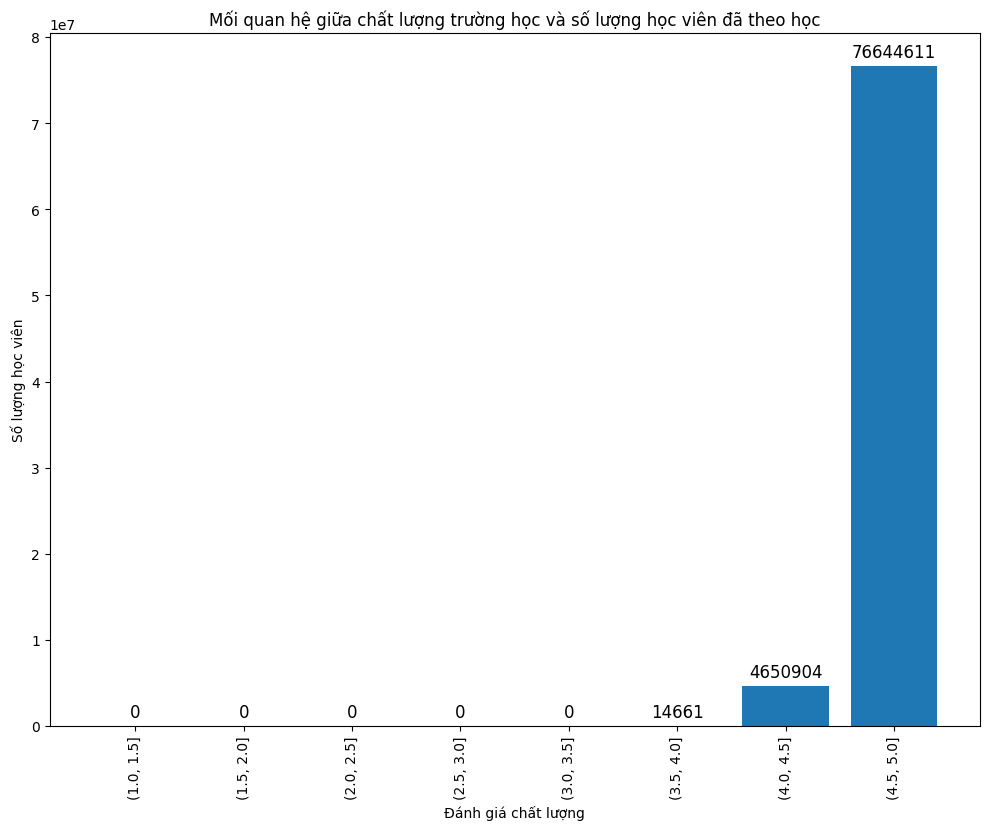

In [6]:
# Plot line chart
plt.figure(figsize=(12, 9))
plt.bar(uni_plot.index.values, uni_plot['enrollment'])
plt.title("Mối quan hệ giữa chất lượng trường học và số lượng học viên đã theo học")

plt.xlabel("Đánh giá chất lượng")
plt.xticks(uni_plot.index.values, rotation=90)
plt.ylabel("Số lượng học viên")

for i in range(len(uni_plot.index.values)):
    plt.text(uni_plot.index.values[i], uni_plot['enrollment'].iloc[i]+1000000, uni_plot['enrollment'].iloc[i], ha="center", fontsize=12)

#plt.grid()
plt.show()

[3.7        3.8        3.85       4.1        4.2        4.3
 4.33666667 4.35       4.36666667 4.4        4.41428571 4.415
 4.45       4.46666667 4.46666667 4.47142857 4.47272727 4.475
 4.49444444 4.5        4.51428571 4.52307692 4.52698413 4.53181818
 4.53333333 4.54       4.54242424 4.55       4.55294118 4.55740741
 4.55882353 4.56       4.56470588 4.56666667 4.57142857 4.58888889
 4.59090909 4.59677419 4.6        4.6        4.60434783 4.61132075
 4.61333333 4.61428571 4.61666667 4.61764706 4.62       4.62222222
 4.625      4.62666667 4.6328125  4.63333333 4.63333333 4.63880597
 4.64098361 4.64285714 4.64444444 4.64651163 4.64666667 4.65
 4.65       4.65294118 4.655      4.65555556 4.65714286 4.66
 4.66666667 4.67       4.67068966 4.67142857 4.67272727 4.67692308
 4.68       4.68       4.68571429 4.69       4.69454545 4.7
 4.7        4.71111111 4.71666667 4.72       4.725      4.73
 4.74       4.74       4.75       4.75833333 4.76666667 4.76923077
 4.77142857 4.775      4.78333333 4.7

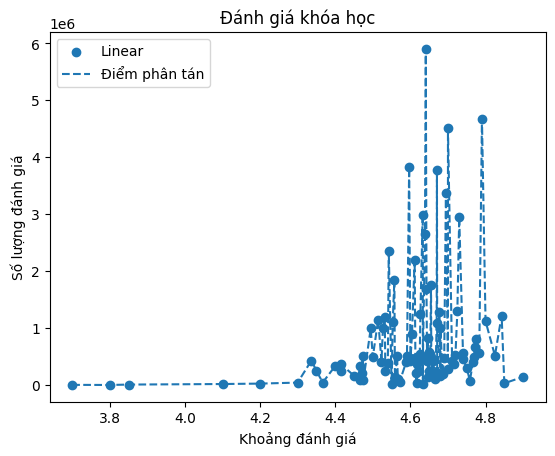

In [7]:
uni_plot = uni_df.reset_index().drop(columns=['offered by', 'rating_bin']).groupby('rating').sum()
print(uni_plot.index.values)

# Vẽ biểu đồ scatter plot
plt.title("Đánh giá khóa học")
plt.xlabel("Khoảng đánh giá")
plt.ylabel("Số lượng đánh giá")
plt.scatter(uni_plot.index.values, uni_plot['enrollment'])

# Vẽ đường linear
plt.plot(uni_plot.index.values, uni_plot['enrollment'], linestyle="--")

# Chú thích biểu đồ
plt.legend(["Linear", "Điểm phân tán"])

# Hiển thị biểu đồ
plt.show()

## **Question 5:**
Coursera course registrants can be from any country in the world. **So does the existence of a language barrier affect course selection?**
- **_Answering this question will help_** learners determine the common languages in which they and the school providing the course communicate, from which learners will proactively equip the necessary language for learning on Coursera in the future.
- **_How we answer this question:_** We answer this question by looking at the total number of `enrollments` in each `language` on the Coursera system.

### **_Step 01:_** Preprocessing